In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dataset

In [89]:
df = pd.read_excel('/content/drive/MyDrive/THESIS/Dataset/Concrete_Data.xlsx')

In [90]:
df.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


# Data Analysis

In [91]:
df.shape

(1030, 9)

In [92]:
df.drop_duplicates(inplace = True)
df.shape

(1005, 9)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1005 non-null   float64
 1   Blast Furnace Slag             1005 non-null   float64
 2   Fly Ash                        1005 non-null   float64
 3   Water                          1005 non-null   float64
 4   Superplasticizer               1005 non-null   float64
 5   Coarse Aggregate               1005 non-null   float64
 6   Fine Aggregate                 1005 non-null   float64
 7   Age                            1005 non-null   int64  
 8   Concrete compressive strength  1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [94]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water ',
       'Superplasticizer ', 'Coarse Aggregate ', 'Fine Aggregate ', 'Age',
       'Concrete compressive strength'],
      dtype='object')

In [95]:
df.isnull().sum()*100/df.shape[0]

Cement                           0.0
Blast Furnace Slag               0.0
Fly Ash                          0.0
Water                            0.0
Superplasticizer                 0.0
Coarse Aggregate                 0.0
Fine Aggregate                   0.0
Age                              0.0
Concrete compressive strength    0.0
dtype: float64

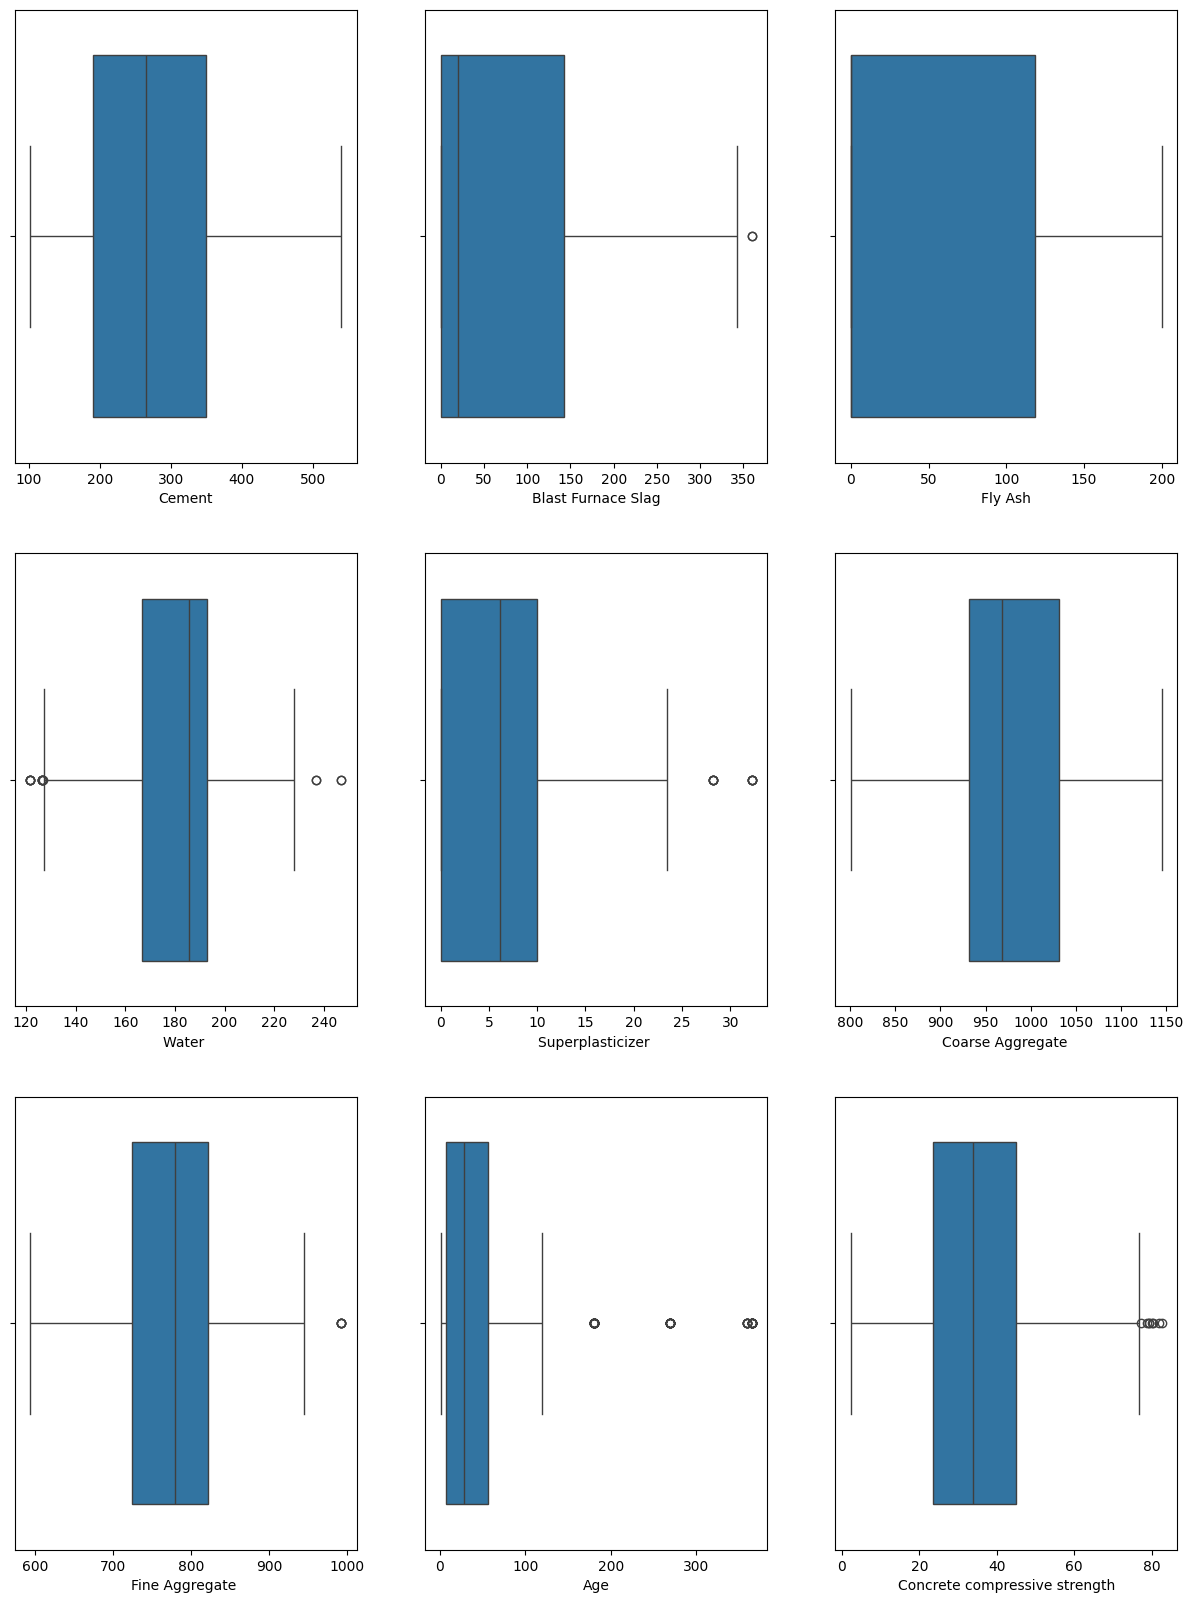

In [96]:
j = 1
plt.figure(figsize=(15,20))
for i in ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water ', 'Superplasticizer ', 'Coarse Aggregate ', 'Fine Aggregate ', 'Age', 'Concrete compressive strength']:
    plt.subplot(3, 3, j)
    sns.boxplot(df[i], orient='h')
    plt.xlabel(xlabel=i)
    j += 1
plt.show()

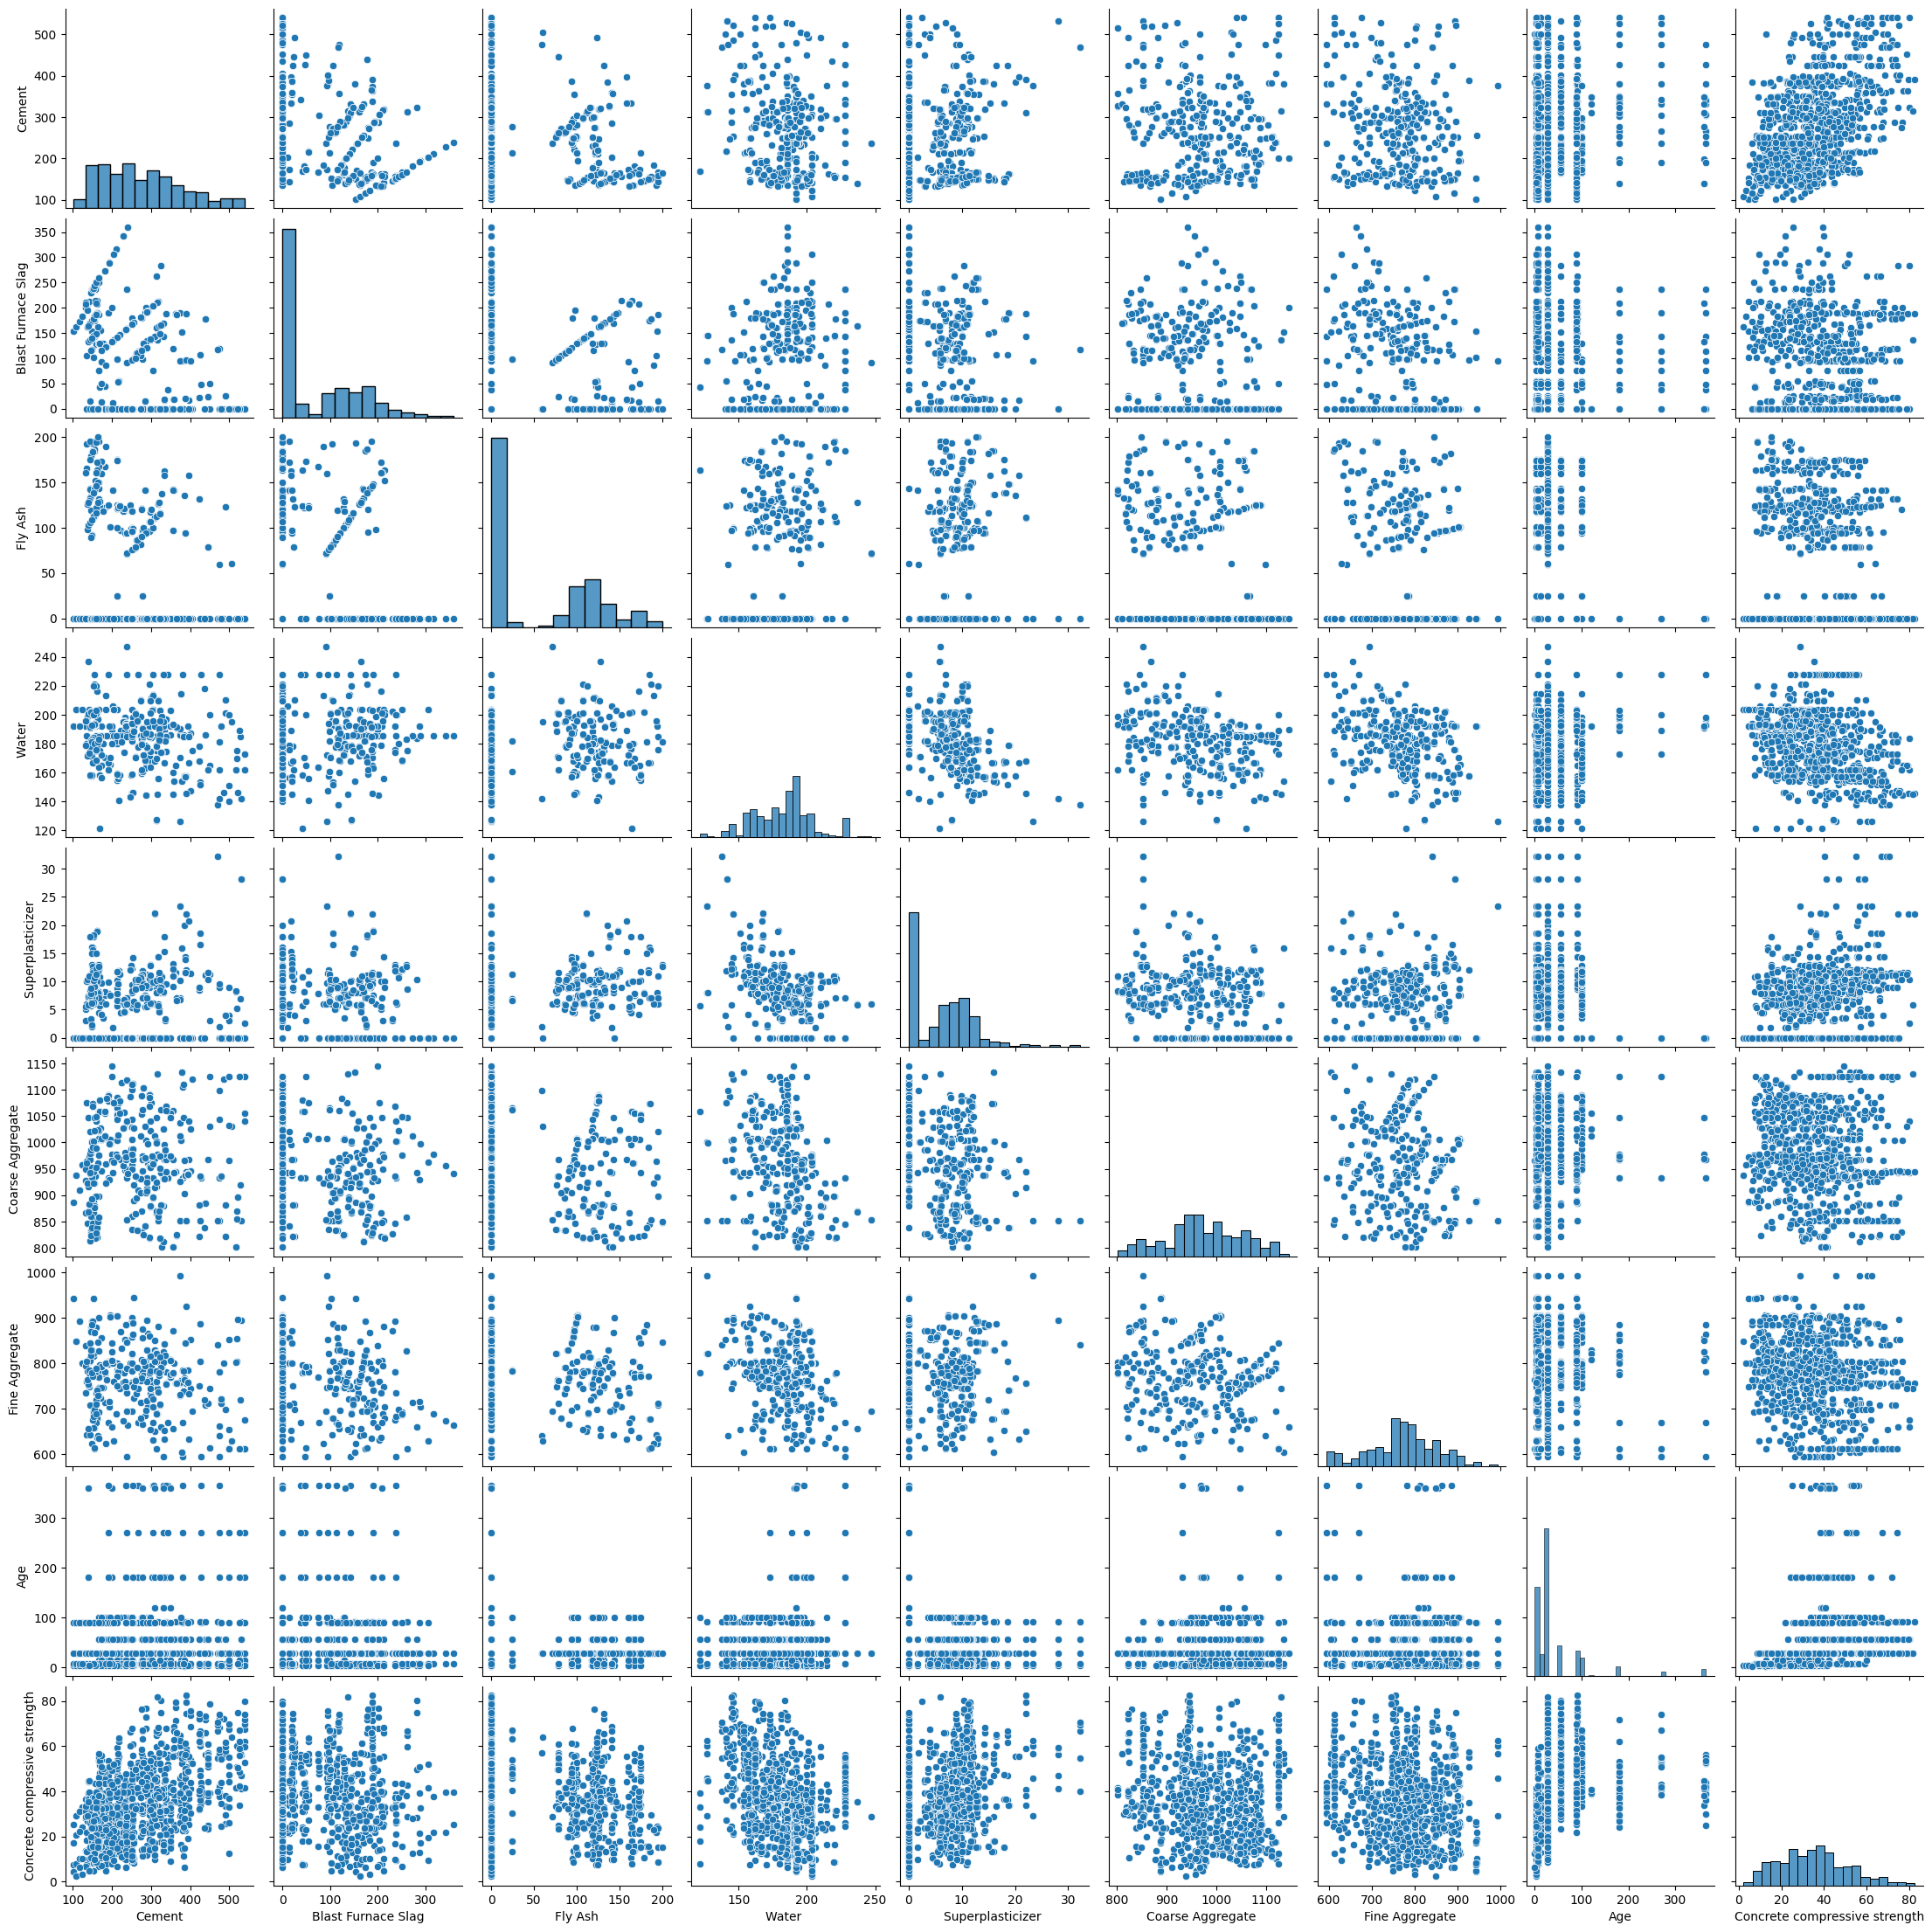

In [97]:
sns.pairplot(df)

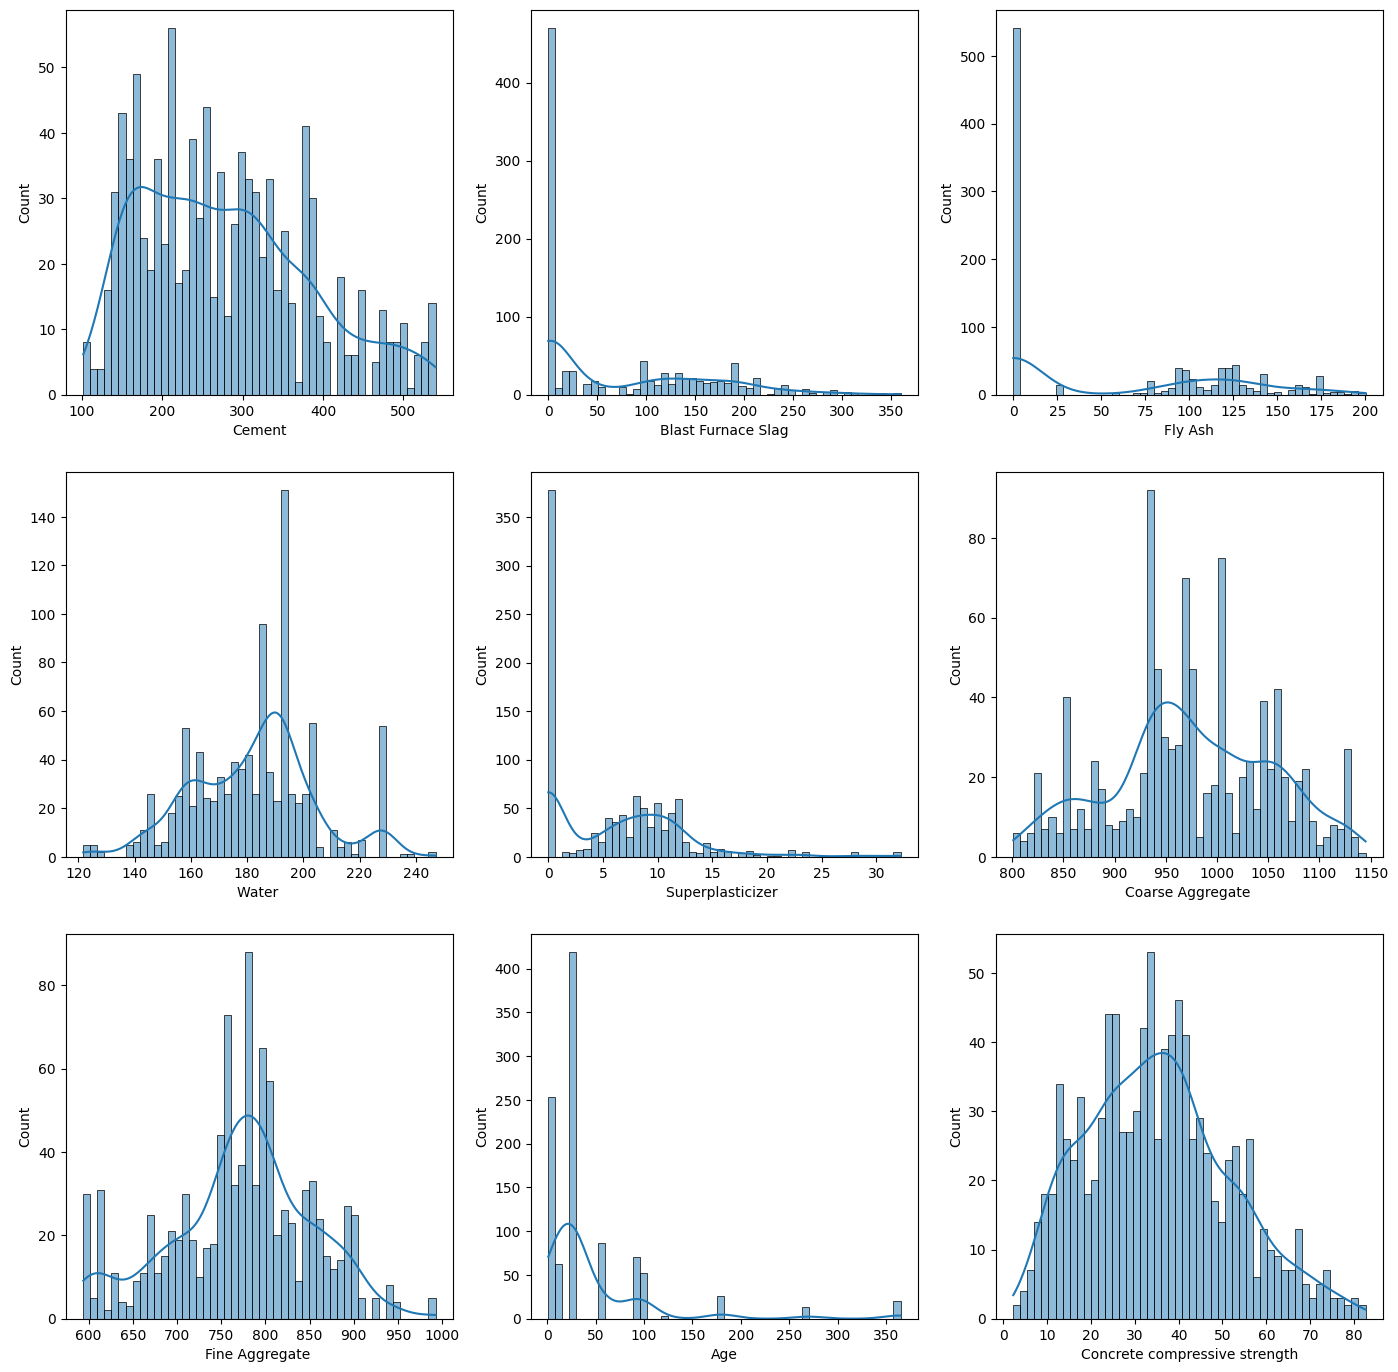

In [98]:
plt.figure(figsize=(17,17))
j = 1
for i in df.columns:
    plt.subplot(3,3,j)
    sns.histplot(df[i],bins = 50, kde= True)
    j += 1

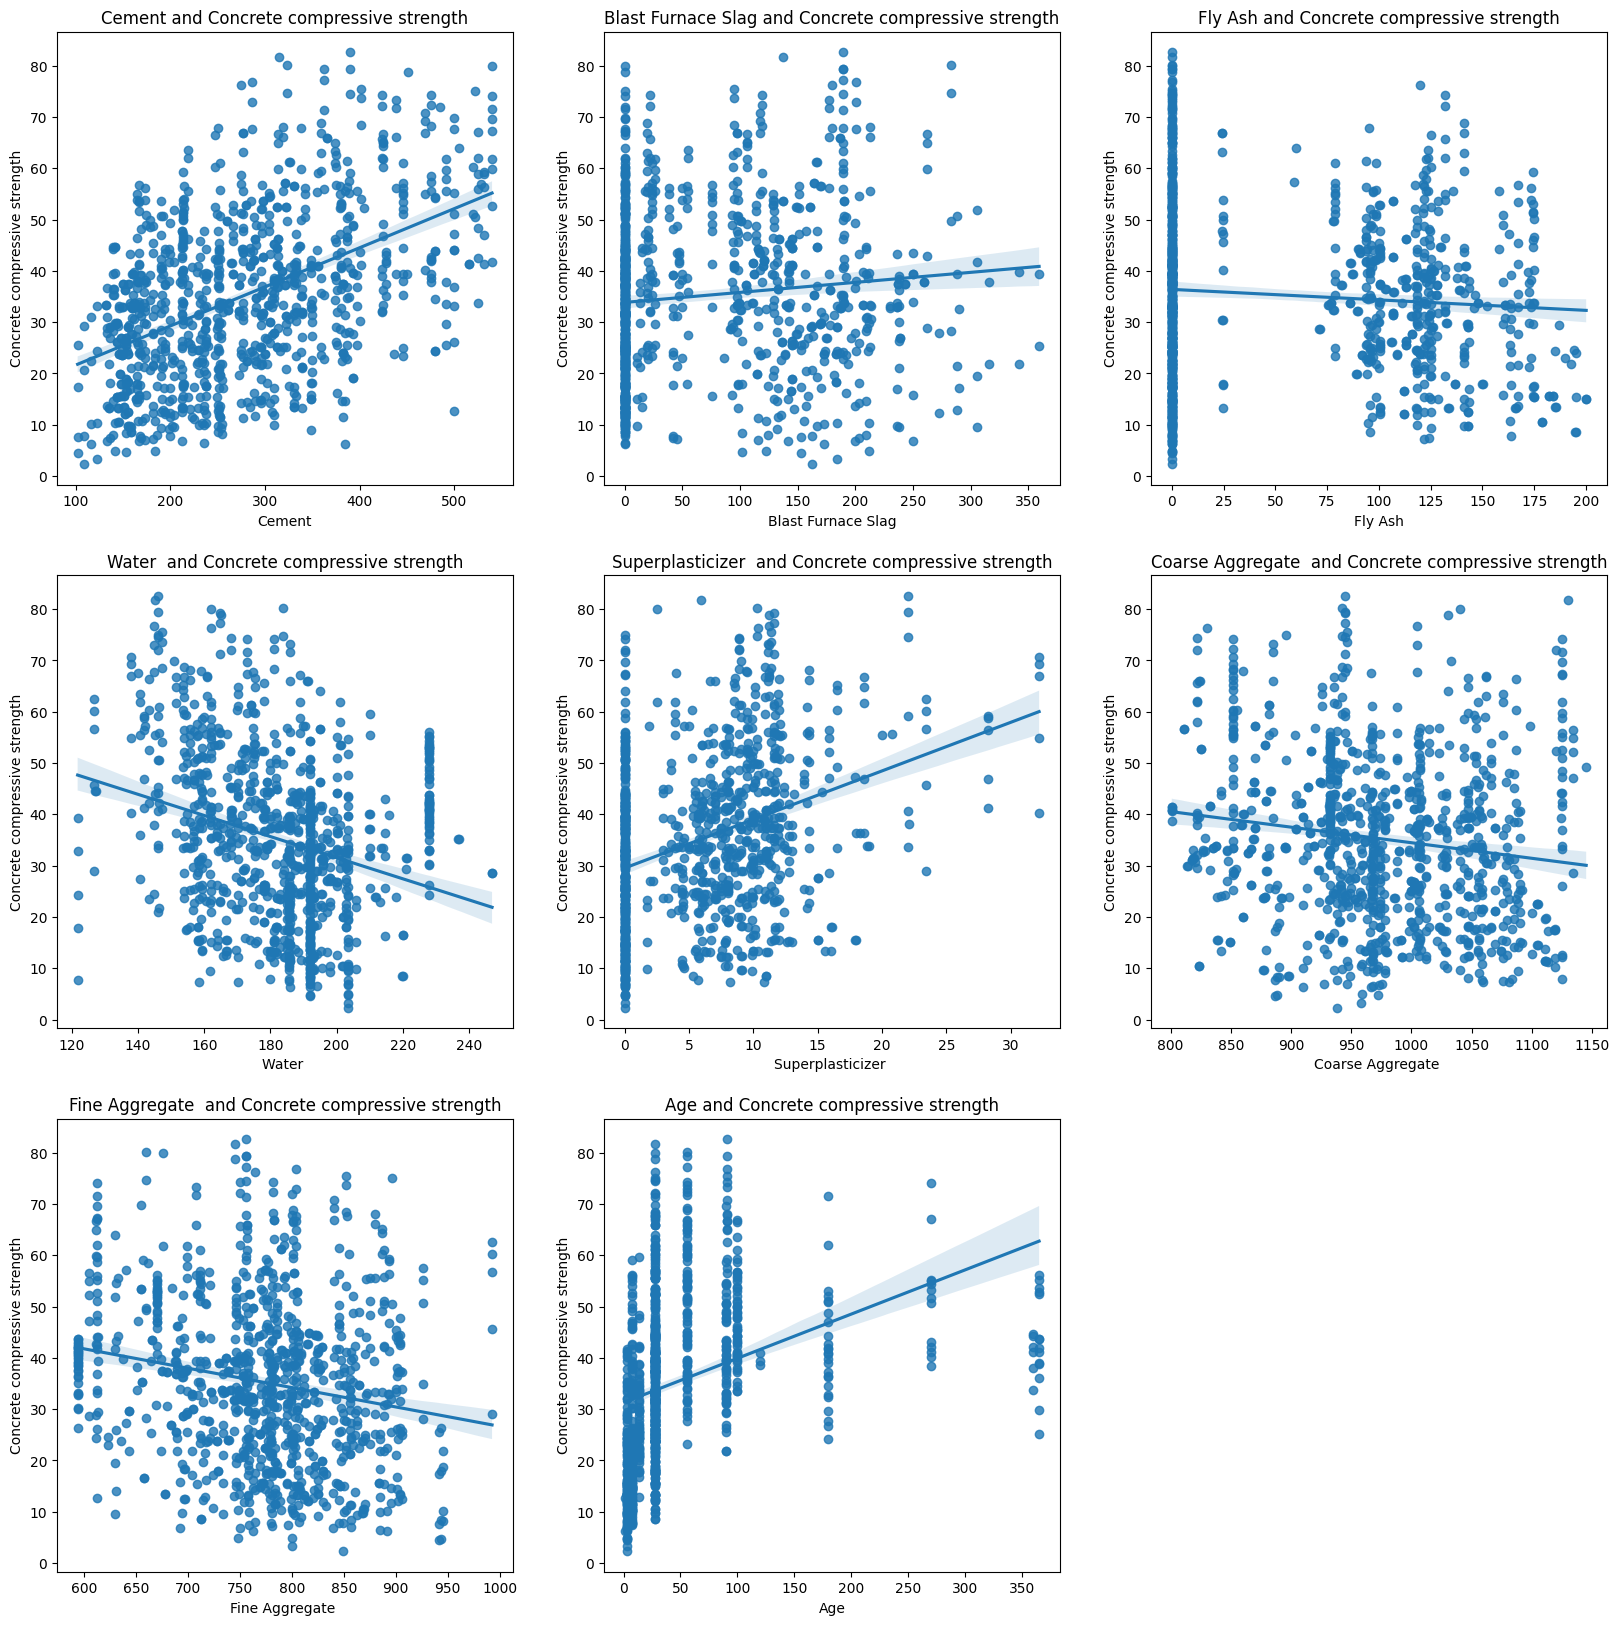

In [99]:
plt.figure(figsize=(20, 20))
j = 1
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3 , j)
    sns.regplot(x=col, y='Concrete compressive strength', data=df)
    plt.title("%s and Concrete compressive strength" %(col))
    j += 1
plt.show()

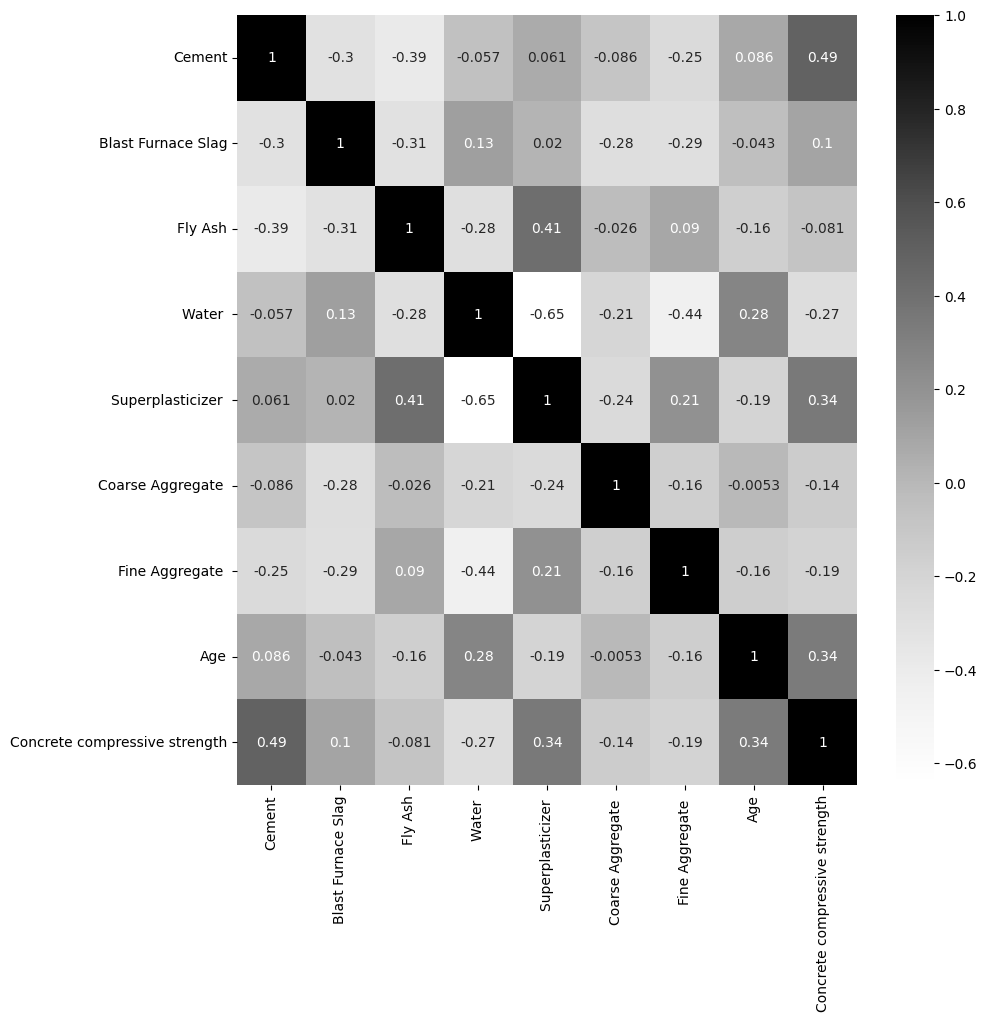

In [100]:
columns = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water ', 'Superplasticizer ', 'Coarse Aggregate ', 'Fine Aggregate ', 'Age', 'Concrete compressive strength']

df_selected = df[columns]
plt.figure(figsize = (10, 10))
sns.heatmap(df_selected.corr(), annot = True, cmap="Greys")
plt.show()

# Linear Regression

In [171]:
X = df.drop('Concrete compressive strength', axis = 1)
y = df['Concrete compressive strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

linreg_model = LinearRegression()
scaler = StandardScaler()

linreg_pipeline = make_pipeline(
    scaler,
    linreg_model
)

linreg_pipeline.fit(X_train, y_train)
y_pred = linreg_pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE: ", mse)
print("RMSE: ", rmse)

coefficients = linreg_pipeline.named_steps['linearregression'].coef_
print("Coefficients: ", coefficients)

y_intercept = linreg_pipeline.named_steps['linearregression'].intercept_
print("Y-intercept: ", y_intercept)

R2 score:  0.580108901995383
MSE:  125.265338276725
RMSE:  11.19219988548833
Coefficients:  [12.11684369  8.43550381  5.43980153 -2.83544903  1.96232006  1.19481542
  1.66718466  6.8947679 ]
Y-intercept:  35.06680914403519


In [180]:
joblib.dump(linreg_pipeline, '/content/drive/MyDrive/Colab Notebooks/linreg_model.pckl')
loaded_model_joblib = joblib.load('/content/drive/MyDrive/Colab Notebooks/linreg_model.pckl')
print(linreg_pipeline.score(X_test, y_test))

0.580108901995383


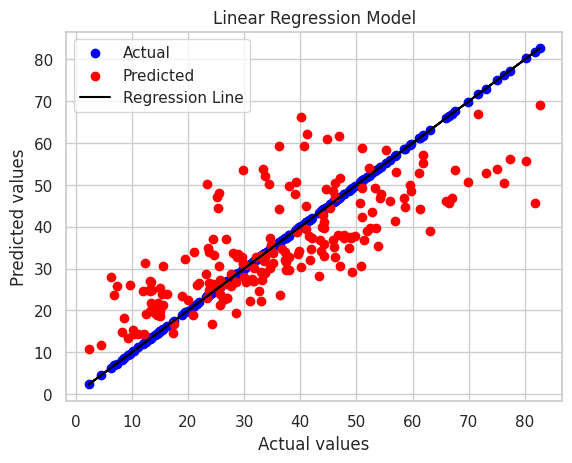

In [181]:
def plot_linear_regression(y_test, y_pred):
  plt.scatter(y_test, y_test, color='blue', label='Actual')
  plt.scatter(y_test, y_pred, color='red', label='Predicted')
  plt.plot(y_test, y_test, color='black', label='Regression Line')
  plt.title('Linear Regression Model')
  plt.xlabel('Actual values')
  plt.ylabel('Predicted values')
  plt.legend()

plot_linear_regression(y_test, y_pred)

plt.show()

# Ridge

In [183]:
X = df.drop('Concrete compressive strength', axis = 1)
y = df['Concrete compressive strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

ridge_model = Ridge(alpha=1.0)
scaler = StandardScaler()

ridge_pipeline = make_pipeline(
    scaler,
    ridge_model
)

ridge_pipeline.fit(X_train, y_train)
y_pred = ridge_pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE: ", mse)
print("RMSE: ", rmse)

coefficients = ridge_pipeline.named_steps['ridge'].coef_
print("Coefficients: ", coefficients)

y_intercept = ridge_pipeline.named_steps['ridge'].intercept_
print("Y-intercept: ", y_intercept)

R2 score:  0.5799561422765537
MSE:  125.31091080242311
RMSE:  11.194235605990393
Coefficients:  [11.90787939  8.22733128  5.25594478 -2.97893569  1.96106584  1.05154965
  1.47833908  6.87422417]
Y-intercept:  35.06680914403519


In [191]:
joblib.dump(ridge_pipeline, '/content/drive/MyDrive/Colab Notebooks/ridge_model.pckl')
loaded_model_joblib = joblib.load('/content/drive/MyDrive/Colab Notebooks/ridge_model.pckl')
print(ridge_pipeline.score(X_test, y_test))

0.5799561422765537


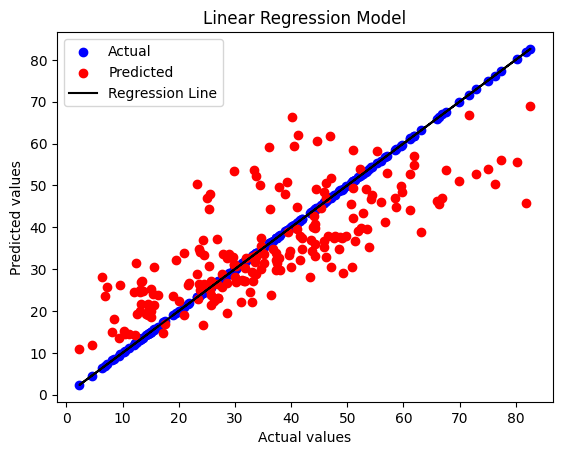

In [124]:
def ridge(y_test, y_pred):
  plt.scatter(y_test, y_test, color='blue', label='Actual')
  plt.scatter(y_test, y_pred, color='red', label='Predicted')
  plt.plot(y_test, y_test, color='black', label='Regression Line')
  plt.title('Linear Regression Model')
  plt.xlabel('Actual values')
  plt.ylabel('Predicted values')
  plt.legend()

ridge(y_test, y_pred)

plt.show()

# RidgeCV

In [193]:
X = df.drop('Concrete compressive strength', axis = 1)
y = df['Concrete compressive strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

ridgecv_model = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
scaler = StandardScaler()

ridgecv_pipeline = make_pipeline(
    scaler,
    ridgecv_model
)

ridgecv_pipeline.fit(X_train, y_train)
y_pred = ridgecv_pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE: ", mse)
print("RMSE: ", rmse)

coefficients = ridgecv_pipeline.named_steps['ridgecv'].coef_
print("Coefficients: ", coefficients)

y_intercept = ridgecv_pipeline.named_steps['ridgecv'].intercept_
print("Y-intercept: ", y_intercept)

R2 score:  0.5799561422765749
MSE:  125.31091080241676
RMSE:  11.19423560599011
Coefficients:  [11.90787939  8.22733128  5.25594478 -2.97893569  1.96106584  1.05154965
  1.47833908  6.87422417]
Y-intercept:  35.06680914403519


In [194]:
joblib.dump(ridgecv_pipeline, '/content/drive/MyDrive/Colab Notebooks/ridgecv_model.pckl')
loaded_model_joblib = joblib.load('/content/drive/MyDrive/Colab Notebooks/ridgecv_model.pckl')
print(ridgecv_pipeline.score(X_test, y_test))

0.5799561422765749


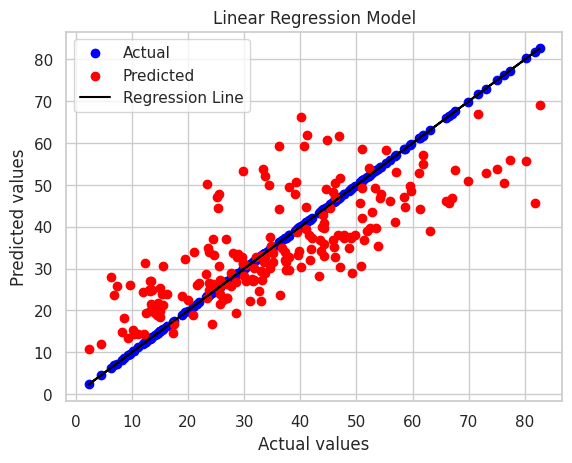

In [195]:
def ridgecv(y_test, y_pred):
  plt.scatter(y_test, y_test, color='blue', label='Actual')
  plt.scatter(y_test, y_pred, color='red', label='Predicted')
  plt.plot(y_test, y_test, color='black', label='Regression Line')
  plt.title('Linear Regression Model')
  plt.xlabel('Actual values')
  plt.ylabel('Predicted values')
  plt.legend()

ridgecv(y_test, y_pred)

plt.show()

# SGD Regressor

In [224]:
X = df.drop('Concrete compressive strength', axis = 1)
y = df['Concrete compressive strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)
scaler = StandardScaler()

sgd_pipeline = make_pipeline(
    scaler,
    sgd_model
)

sgd_pipeline.fit(X_train, y_train)
y_pred = sgd_pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE: ", mse)
print("RMSE: ", rmse)

coefficients = sgd_pipeline.named_steps['sgdregressor'].coef_
print("Coefficients: ", coefficients)

y_intercept = sgd_pipeline.named_steps['sgdregressor'].intercept_
print("Y-intercept: ", y_intercept)

R2 score:  0.5795732935828216
MSE:  125.42512534842575
RMSE:  11.199335933367914
Coefficients:  [10.67606639  7.05036986  4.16389876 -4.07534307  1.73339652  0.07721787
  0.1804996   6.7842369 ]
Y-intercept:  [35.04503465]


In [229]:
joblib.dump(sgd_pipeline, '/content/drive/MyDrive/Colab Notebooks/sgd_model.pckl')
loaded_model_joblib = joblib.load('/content/drive/MyDrive/Colab Notebooks/sgd_model.pckl')
print(sgd_pipeline.score(X_test, y_test))

0.5795732935828216


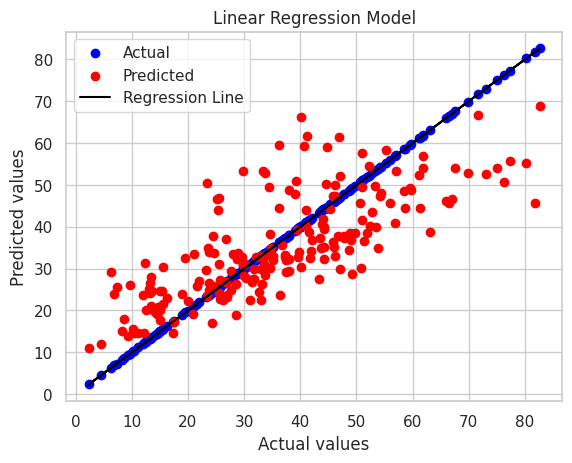

In [230]:
def sgd_regressor(y_test, y_pred):
  plt.scatter(y_test, y_test, color='blue', label='Actual')
  plt.scatter(y_test, y_pred, color='red', label='Predicted')
  plt.plot(y_test, y_test, color='black', label='Regression Line')
  plt.title('Linear Regression Model')
  plt.xlabel('Actual values')
  plt.ylabel('Predicted values')
  plt.legend()

sgd_regressor(y_test, y_pred)

plt.show()

# Decision Tree Regressor

In [236]:
X = df.drop('Concrete compressive strength', axis = 1)
y = df['Concrete compressive strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

dtree_model = DecisionTreeRegressor()
scaler = StandardScaler()

dtree_pipeline = make_pipeline(
    scaler,
    dtree_model
)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dtree_pipeline.fit(X_train_scaled, y_train)
y_pred = dtree_pipeline.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE: ", mse)
print("RMSE: ", rmse)

R2 score:  0.8689583290427171
MSE:  39.09342045787034
RMSE:  6.252473147313016


In [240]:
joblib.dump(dtree_pipeline, '/content/drive/MyDrive/Colab Notebooks/dt_model.pckl')
loaded_model_joblib = joblib.load('/content/drive/MyDrive/Colab Notebooks/dt_model.pckl')
print(r2_score(y_test, y_pred))

0.8689583290427171


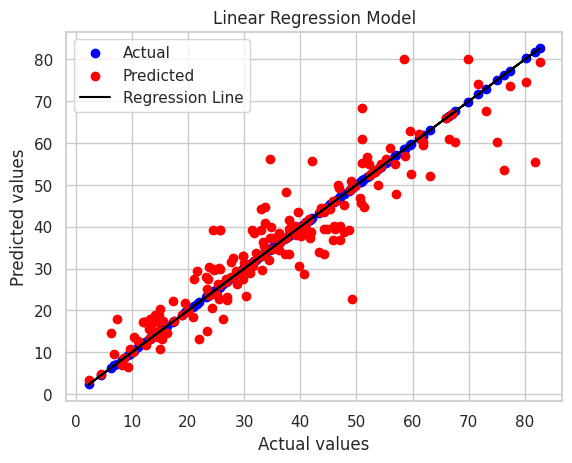

In [241]:
def decision_tree(y_test, y_pred):
  plt.scatter(y_test, y_test, color='blue', label='Actual')
  plt.scatter(y_test, y_pred, color='red', label='Predicted')
  plt.plot(y_test, y_test, color='black', label='Regression Line')
  plt.title('Linear Regression Model')
  plt.xlabel('Actual values')
  plt.ylabel('Predicted values')
  plt.legend()

decision_tree(y_test, y_pred)

plt.show()

# Random Forest Regressor

In [242]:
X = df.drop('Concrete compressive strength', axis = 1)
y = df['Concrete compressive strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
scaler = StandardScaler()

rf_pipeline = make_pipeline(
    scaler,
    rf_model
)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_pipeline.fit(X_train_scaled, y_train)
y_pred = rf_pipeline.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE: ", mse)
print("RMSE: ", rmse)

R2 score:  0.911912212042469
MSE:  26.279067617735535
RMSE:  5.126311307142353


In [248]:
joblib.dump(rf_pipeline, '/content/drive/MyDrive/Colab Notebooks/rf_model.pckl')
loaded_model_joblib = joblib.load('/content/drive/MyDrive/Colab Notebooks/rf_model.pckl')
print(r2_score(y_test, y_pred))

0.911912212042469


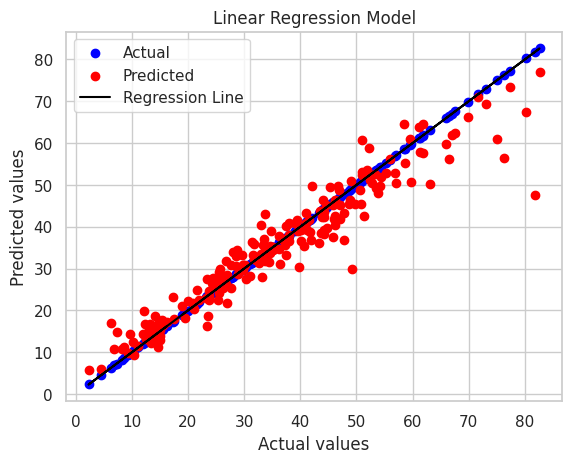

In [244]:
def random_forest(y_test, y_pred):
  plt.scatter(y_test, y_test, color='blue', label='Actual')
  plt.scatter(y_test, y_pred, color='red', label='Predicted')
  plt.plot(y_test, y_test, color='black', label='Regression Line')
  plt.title('Linear Regression Model')
  plt.xlabel('Actual values')
  plt.ylabel('Predicted values')
  plt.legend()

random_forest(y_test, y_pred)

plt.show()

# Comparison

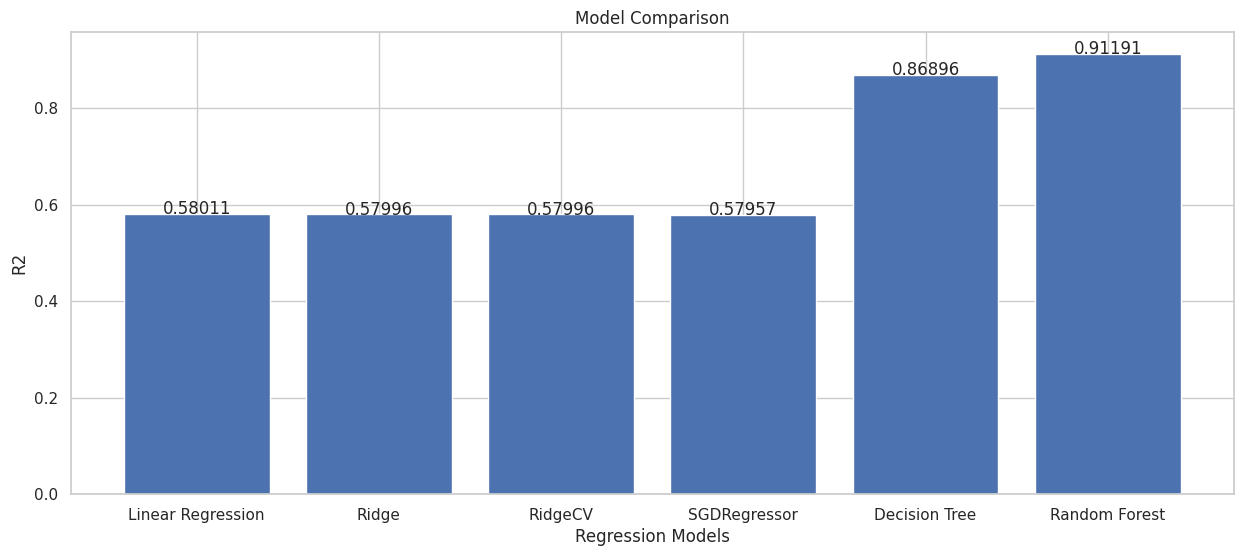

In [247]:
models = ['Linear Regression', 'Ridge', 'RidgeCV', 'SGDRegressor', 'Decision Tree', 'Random Forest']
scores = [0.580108901995383,
          0.5799561422765537,
          0.5799561422765749,
          0.5795732935828216,
          0.8689583290427171,
          0.911912212042469
          ]

fig = plt.subplots(figsize=(15, 6))
plt.bar(models, scores)
plt.xlabel('Regression Models')
plt.ylabel('R2')
plt.title('Model Comparison')
for i, score in enumerate(scores):
    plt.text(i, score, str(round(score, 5)), ha='center')
plt.show()